In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import os
import numpy as np
import pandas as pd
from torch import nn

import gymnasium as gym

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from datetime import datetime
from tqdm import tqdm

from inspect import getsource
import torch
torch.set_printoptions(sci_mode=False)
import random
from collections import deque

from drl_nav.utils.context import Context
from drl_nav.config.config import AgentConfiguration
from drl_nav.agent import Agent_PER, Agent_DQN_pixel
from drl_nav.network.heads import LabelizerNet, AuxNet, QNet
from drl_nav.network.bodies import ConvBody

C:\Users\pierr\environment\RL\lib\site-packages\gymnasium\core.py:27: UserWarning: WARN: Gymnasium minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gymnasium minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


_____

In [2]:
env = gym.make('CartPole-v1', render_mode="human")

if len(env.observation_space.shape):
    state_size = env.observation_space.shape[0]
else:
    state_size = env.observation_space.shape
    
if isinstance(env.action_space, gym.spaces.discrete.Discrete):
    action_size = env.action_space.n

print(f"state size: {state_size}")    
print(f"action space: {env.action_space}")

env.close()

state size: 4
action space: Discrete(2)


#### Random interaction loop

In [4]:
N_EPISODES = 5
render = None # "human"

env = gym.make('CartPole-v1', render_mode=None)

#for i in tqdm(range(1, N_EPISODES + 1)):
for i in range(1, N_EPISODES + 1):
    
    score, step = 0, 0
    state, _ = env.reset()
    
    while True:
        
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated
        
        state = next_state
        score += reward
        step += 1
        
        if (done | (step > 200)):
            print(score)
            break
            
env.close()

20.0
13.0
16.0
23.0
16.0


#### Interaction loop with agent

In [3]:
context = Context(
    state_size=state_size,
    action_size=action_size,
    input_type='vector'
)
config = AgentConfiguration(
    network_body={
        'type': 'dummy',
        'input_size': state_size
    },
    network_head={
        'hidden_layers': [2000, 1000, 128, 64]
    }
)

agent = Agent_DQN_pixel(context, config)

In [4]:
%%time

N_EPISODES = 800
render = None # "human" 

# records
scores = []
actions = []

env = gym.make('CartPole-v1', render_mode=render)

for i in tqdm(range(1, N_EPISODES + 1)):
    
    score, step = 0, 0
    state, _ = env.reset()
    
    while True:
        
        action = agent.act(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated
        agent.step(state, action, reward, next_state, done)
        
        
        score += reward
        state = next_state
        step += 1
        actions.append(action)
        
        if (done | (step > 500)):
            scores.append(score)
            break
            
env.close()

100%|██████████| 800/800 [27:17<00:00,  2.05s/it]

Wall time: 27min 17s


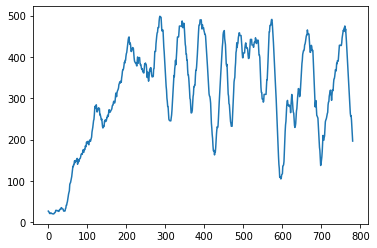

In [11]:
window_size = 20
plt.plot(np.convolve(scores, np.ones(window_size)/window_size, mode='valid'))

In [6]:
context = Context(
    state_size=state_size,
    action_size=action_size,
    input_type='vector'
)
config = AgentConfiguration(
    network_body={
        'type': 'dummy',
        'input_size': state_size
    }
)

agent = Agent_DQN_pixel(context, config)

In [4]:
%%time

N_EPISODES = 800
render = None # "human" 

# records
scores = []
actions = []

env = gym.make('CartPole-v1', render_mode=render)

for i in tqdm(range(1, N_EPISODES + 1)):
    
    score, step = 0, 0
    state, _ = env.reset()
    
    while True:
        
        action = agent.act(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated | truncated
        agent.step(state, action, reward, next_state, done)
        
        
        score += reward
        state = next_state
        step += 1
        actions.append(action)
        
        if (done | (step > 500)):
            scores.append(score)
            break
            
env.close()

100%|██████████| 800/800 [02:41<00:00,  4.95it/s] 

Wall time: 2min 41s


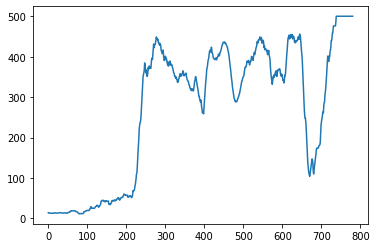

In [24]:
window_size = 20
plt.plot(np.convolve(scores, np.ones(window_size)/window_size, mode='valid'))